In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D
import warnings

podaci = []
labele = []
klase = 43

# ucitavanje trening i validacijskih slika
brojac = 0
for i in range(klase):
    path = os.path.join(os.getcwd(), 'Njemacki dataset\\Train', str(i))
    images = os.listdir(path)
    print("Klasa je:", i)
    print("Brojac je:", brojac)
    
    for j in images:
        try:
            image = Image.open(path + '\\' + j)
            image = image.resize((32, 32))
            image = np.array(image)
            podaci.append(image)
            labele.append(i)
            brojac += 1
        except:
            print("Error loading image")

print("Brojac je:", brojac)

Klasa je: 0
Brojac je: 0
Klasa je: 1
Brojac je: 210
Klasa je: 2
Brojac je: 2430
Klasa je: 3
Brojac je: 4680
Klasa je: 4
Brojac je: 6090
Klasa je: 5
Brojac je: 8070
Klasa je: 6
Brojac je: 9930
Klasa je: 7
Brojac je: 10350
Klasa je: 8
Brojac je: 11790
Klasa je: 9
Brojac je: 13200
Klasa je: 10
Brojac je: 14670
Klasa je: 11
Brojac je: 16680
Klasa je: 12
Brojac je: 18000
Klasa je: 13
Brojac je: 20100
Klasa je: 14
Brojac je: 22260
Klasa je: 15
Brojac je: 23040
Klasa je: 16
Brojac je: 23670
Klasa je: 17
Brojac je: 24090
Klasa je: 18
Brojac je: 25200
Klasa je: 19
Brojac je: 26400
Klasa je: 20
Brojac je: 26610
Klasa je: 21
Brojac je: 26970
Klasa je: 22
Brojac je: 27300
Klasa je: 23
Brojac je: 27690
Klasa je: 24
Brojac je: 28200
Klasa je: 25
Brojac je: 28470
Klasa je: 26
Brojac je: 29970
Klasa je: 27
Brojac je: 30570
Klasa je: 28
Brojac je: 30810
Klasa je: 29
Brojac je: 31350
Klasa je: 30
Brojac je: 31620
Klasa je: 31
Brojac je: 32070
Klasa je: 32
Brojac je: 32850
Klasa je: 33
Brojac je: 33090
K

In [ ]:
# Pretvaranje lista u numpy nizove
podaci = np.array(podaci)
labele = np.array(labele)

print("Podaci imaju oblik:", podaci.shape)
print("Labele imaju oblik:", labele.shape)

X_train, X_validation, y_train, y_validation = train_test_split(podaci, labele, test_size=0.2, random_state=68)

print("X_train ima oblik:", X_train.shape)
print("X_validation ima oblik:", X_validation.shape)
print("y_train ima oblik:", y_train.shape)
print("y_validation ima oblik:", y_validation.shape)

Podaci imaju oblik: (39209, 32, 32, 3)
Labele imaju oblik: (39209,)
X_train ima oblik: (31367, 32, 32, 3)
X_validation ima oblik: (7842, 32, 32, 3)
y_train ima oblik: (31367,)
y_test ima oblik: (7842,)


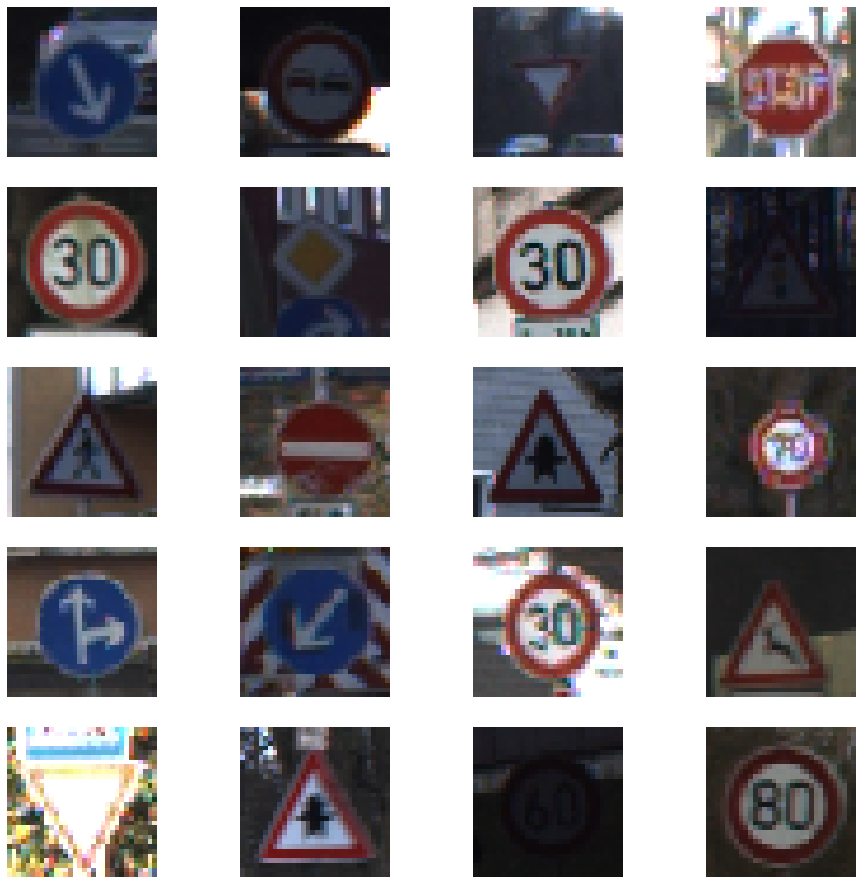

In [ ]:
# prikazi neke slike koje su ucitane

fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(0, columns*rows):
    # random slike iz dataseta
    #img = X_train[randint(0, n_train-1)]
    
    # prikazi prvih 20 slika
    img = X_train[i]
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.axis('off')   

plt.show()

In [ ]:
# linearna normalizacija slika
def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [ ]:
# primijeni normalizaciju
normalized_X_train = normalize(X_train)
normalized_X_validation = normalize(X_validation)

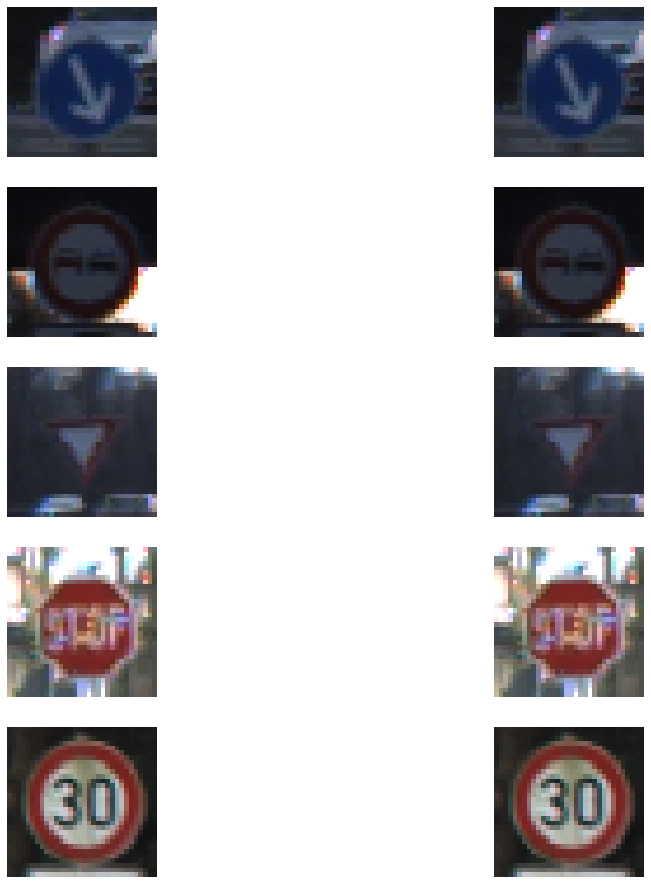

In [ ]:
# prikazi nakon normalizacije
fig = plt.figure(figsize=(16, 16))
columns = 2
rows = 5
for i in range(0, columns*rows):
    # random slike iz dataseta
    #img = X_train[randint(0, n_train-1)]
    
    # prikazi prvih 20 slika
    indeks = int(i/2)
    img = normalized_X_train[indeks]
    if(i%2==1):
        img = X_train[indeks]
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.axis('off')   

plt.show()

In [ ]:
# prebaci u normalizovane podatke
X_train = normalized_X_train
X_validation = normalized_X_validation

In [ ]:
# pretvaranje labela u hot one encoding
y_train = to_categorical(y_train, 43)
y_validation = to_categorical(y_validation, 43)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367, 43) (7842, 43)


In [ ]:
# Najbolji model
# na 25 epoha sa linearnom normalizacijom: loss: 0.0450 - accuracy: 0.9869 - val_loss: 0.0270 - val_accuracy: 0.9943
# testni dataset: 0.9768012668250198

# na 25 epoha sa z-score normalizacijom: loss: 0.0892 - accuracy: 0.9808 - val_loss: 0.0431 - val_accuracy: 0.9939
# testni dataset: 0.9766429136975455

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Prva verzija
# na 20 epoha: loss: 0.0579 - accuracy: 0.9864 - val_loss: 0.1088 - val_accuracy: 0.9783
# testni dataset: 0.923040380047506

# na 25 epoha sa linearnom normalizacijom: loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.1070 - val_accuracy: 0.9832
# testni dataset: 0.9360253365003959

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(filters=12, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=43, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

In [ ]:
# Druga verzija
# na 25 epoha: loss: 0.2154 - accuracy: 0.9525 - val_loss: 0.1831 - val_accuracy: 0.9631
# testni dataset: 0.9037212984956453

# na 25 epoha: loss: 0.0664 - accuracy: 0.9843 - val_loss: 0.1197 - val_accuracy: 0.9806
# testni dataset: 0.9214568487727632

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=412, kernel_size=(5, 5), activation='relu'))

model.add(Flatten())

model.add(Dense(units=122, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=84, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=43, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 412)         165212    
_________________________________________________________________
flatten_2 (Flatten)          (None, 412)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 122)              

In [ ]:
# Treca verzija

# Druga verzija
# na 25 epoha: loss: loss: 0.0999 - accuracy: 0.9822 - val_loss: 0.2444 - val_accuracy: 0.9705
# testni dataset: 0.9052256532066508

# na 25 epoha sa linearnom normalizacijom: loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.1348 - val_accuracy: 0.9765
# testni dataset: 0.9219319081551861

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=412, kernel_size=(5, 5), activation='relu'))

model.add(Flatten())

model.add(Dense(units=122, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=43, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 412)         165212    
_________________________________________________________________
flatten_3 (Flatten)          (None, 412)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 122)              

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_validation, y_validation))

# Treniranje modela
warnings.filterwarnings("ignore", category=DeprecationWarning)
model.save("Trafic_signs_modelNajboljinovi.h5")

Epoch 1/25
981/981 [==============================] - 168s 172ms/step - loss: 0.2787 - accuracy: 0.9136 - val_loss: 0.0949 - val_accuracy: 0.9688
Epoch 2/25
981/981 [==============================] - 192s 196ms/step - loss: 0.1770 - accuracy: 0.9441 - val_loss: 0.0581 - val_accuracy: 0.9827
Epoch 3/25
981/981 [==============================] - 202s 206ms/step - loss: 0.1389 - accuracy: 0.9575 - val_loss: 0.0499 - val_accuracy: 0.9864
Epoch 4/25
981/981 [==============================] - 209s 213ms/step - loss: 0.1151 - accuracy: 0.9640 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 5/25
981/981 [==============================] - 185s 189ms/step - loss: 0.0972 - accuracy: 0.9699 - val_loss: 0.0332 - val_accuracy: 0.9908
Epoch 6/25
981/981 [==============================] - 177s 181ms/step - loss: 0.0906 - accuracy: 0.9723 - val_loss: 0.0455 - val_accuracy: 0.9864
Epoch 7/25
981/981 [==============================] - 158s 161ms/step - loss: 0.0858 - accuracy: 0.9732 - val_loss: 0.0376 -

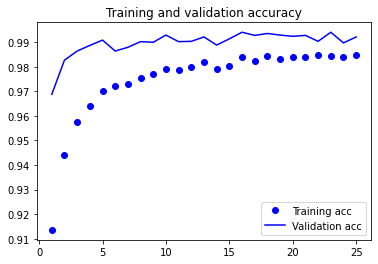

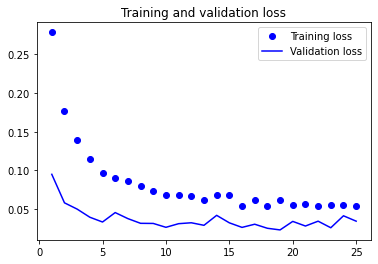

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# provjeravanje tacnosti nad testnim skupom podataka

from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

test_labele = y_test["ClassId"].values
test_imgs = y_test["Path"].values

test_podaci = []
test_brojac = 0

for img in test_imgs:
    if(test_brojac%1000==0):
        print("Testni brojac", test_brojac)
    image = Image.open(img)
    image = image.resize((32,32))
    test_podaci.append(np.array(image))
    test_brojac += 1

X_test=np.array(test_podaci)

# normalizuj test dataset
X_test=normalize(X_test)

test_pred = model.predict_classes(X_test)

# tacnost nad testnim skupom podataka
print("Tacnost nad testnim skupom podataka: ")
print(accuracy_score(test_labele, test_pred))

Testni brojac 0
Testni brojac 1000
Testni brojac 2000
Testni brojac 3000
Testni brojac 4000
Testni brojac 5000
Testni brojac 6000
Testni brojac 7000
Testni brojac 8000
Testni brojac 9000
Testni brojac 10000
Testni brojac 11000
Testni brojac 12000
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Tacnost nad testnim skupom podataka: 
0.9702296120348377


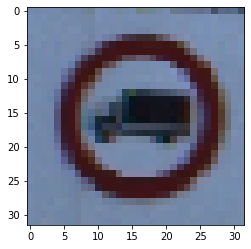

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
import numpy as np

nekiNiz=np.zeros((10,10,3))

brojac=0
for i in range(len(nekiNiz)):
  for j in range(len(nekiNiz[i])):
    nekiNiz[i][j][0] = brojac
    brojac+=1
    nekiNiz[i][j][1] = brojac
    brojac+=1
    nekiNiz[i][j][2] = brojac
    brojac+=1

print("Neki niz je: ", nekiNiz)
print("Maksimum neeki niz je: ", np.max(nekiNiz))
print("Minimum neki niz je: ", np.min(nekiNiz))

maskimum = np.max(nekiNiz)
nekiNiz = nekiNiz-maskimum
print("Neki niz je: ", nekiNiz)
print("Maksimum neeki niz je: ", np.max(nekiNiz))
print("Minimum neki niz je: ", np.min(nekiNiz))

Neki niz je:  [[[  0.   1.   2.]
  [  3.   4.   5.]
  [  6.   7.   8.]
  [  9.  10.  11.]
  [ 12.  13.  14.]
  [ 15.  16.  17.]
  [ 18.  19.  20.]
  [ 21.  22.  23.]
  [ 24.  25.  26.]
  [ 27.  28.  29.]]

 [[ 30.  31.  32.]
  [ 33.  34.  35.]
  [ 36.  37.  38.]
  [ 39.  40.  41.]
  [ 42.  43.  44.]
  [ 45.  46.  47.]
  [ 48.  49.  50.]
  [ 51.  52.  53.]
  [ 54.  55.  56.]
  [ 57.  58.  59.]]

 [[ 60.  61.  62.]
  [ 63.  64.  65.]
  [ 66.  67.  68.]
  [ 69.  70.  71.]
  [ 72.  73.  74.]
  [ 75.  76.  77.]
  [ 78.  79.  80.]
  [ 81.  82.  83.]
  [ 84.  85.  86.]
  [ 87.  88.  89.]]

 [[ 90.  91.  92.]
  [ 93.  94.  95.]
  [ 96.  97.  98.]
  [ 99. 100. 101.]
  [102. 103. 104.]
  [105. 106. 107.]
  [108. 109. 110.]
  [111. 112. 113.]
  [114. 115. 116.]
  [117. 118. 119.]]

 [[120. 121. 122.]
  [123. 124. 125.]
  [126. 127. 128.]
  [129. 130. 131.]
  [132. 133. 134.]
  [135. 136. 137.]
  [138. 139. 140.]
  [141. 142. 143.]
  [144. 145. 146.]
  [147. 148. 149.]]

 [[150. 151. 152.]
  [153.